In [49]:
### identify outliers with interquartile range

from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


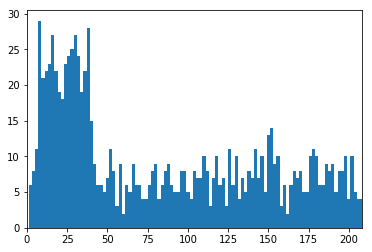

In [51]:
## Skewed distribution 

import math
import numpy as np

values = range(1, 209)
probs = [1.0 / 208] * 208

for idx, prob in enumerate(probs):
    if idx > 3 and idx < 20:
        probs[idx] = probs[idx] * (1 + math.log(idx + 1))
    if idx > 20 and idx < 40:
        probs[idx] = probs[idx] * (1 + math.log((40 - idx) + 1))

probs = [p / sum(probs) for p in probs]
sample =  np.random.choice(values, 1000, p=probs)

%matplotlib inline
from matplotlib import pyplot as plt
#matplotlib.use('TkAgg')

binwidth = 2
plt.hist(sample, bins=np.arange(min(sample), max(sample) + binwidth, binwidth))
plt.xlim([0, max(sample)])
plt.show()

In [64]:
## Missing values -- Drop rows
original_data = pd.read_csv("train.csv")
print(original_data.shape)

# Soln 1 : Drop rows
cols_with_missing = [col for col in original_data.columns 
                                 if original_data[col].isnull().any()]
redued_original_data = original_data.drop(cols_with_missing, axis=1)
print(redued_original_data.shape)


(1460, 81)
(1460, 62)


In [83]:
# Missing value treatment 

import pandas as pd

# Load data
melb_data = pd.read_csv('melb_data.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

melb_target = melb_data.Price
melb_predictors = melb_data.drop(['Price'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])


X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)


cols_with_missing = [col for col in X_train.columns 
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

# Get Model Score from Imputation

from sklearn.preprocessing import Imputer

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))


# Get Score from Imputation with Extra Columns Showing What Was Imputed

imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns 
                                 if X_train[col].isnull().any())
for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

# Imputation

my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:
348483.7107809386
Mean Absolute Error from Imputation:
201642.77066497554
Mean Absolute Error from Imputation while Track What Was Imputed:
205235.9020837108


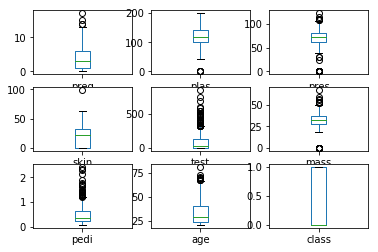

In [93]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()


In [38]:
############ binarization ################

# For instance if I’m building a recommendation system for song recommendations, 
# I would just want to know if a person is interested or has listened to a particular song. 

from sklearn.preprocessing import Binarizer
import pandas
import numpy

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [37]:
############## Rounding ####################


#Often when dealing with continuous numeric attributes like proportions or percentages, 
# we may not need the raw values having a high amount of precision. 
# Hence it often makes sense to round off these high precision percentages into numeric integers.  

import pandas as pd
import numpy as np 

data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42], 'Score':[0.82,0.78,0.91,0.69]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
#print(df)
df['score_scale_10'] = np.array(
                   np.round((df['Score'] * 10)),  
                   dtype='int')
df['score_scale_100'] = np.array(
                  np.round((df['Score'] * 100)),    
                  dtype='int')
df

,Age,Name,Score,score_scale_10,score_scale_100
rank1,28,Tom,0.82,8,82
rank2,34,Jack,0.78,8,78
rank3,29,Steve,0.91,9,91
rank4,42,Ricky,0.69,7,69


/home/daksh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                  ID.x   Age  Age_bin_round
1071  16a328da44ceb840863031f35dd3923e  22.0            2.0
1072  54bda0adcf9aa98fa0b3f9b5f608c851  21.0            2.0
1073  0c74ada07ff4ea3f1bf48b4fd79159f9  40.0            4.0
1074  87f04e2ef23e2c517c73e438da1867b1  34.0            3.0
1075  7a2c672065d3802525c733efc1b16219  29.0            2.0
                                  ID.x   Age  Age_bin_round  \
1071  16a328da44ceb840863031f35dd3923e  22.0            2.0   
1072  54bda0adcf9aa98fa0b3f9b5f608c851  21.0            2.0   
1073  0c74ada07ff4ea3f1bf48b4fd79159f9  40.0            4.0   
1074  87f04e2ef23e2c517c73e438da1867b1  34.0            3.0   
1075  7a2c672065d3802525c733efc1b16219  29.0            2.0   

     Age_bin_custom_range Age_bin_custom_label  
1071             (15, 30]                    2  
1072             (15, 30]                    2  
1073             (30, 45]                    3  
1074             (30, 45]                    3  
1075            

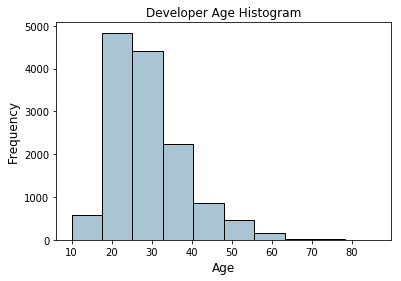

In [36]:
####################### Binning #############################

# These discrete values or numbers can be thought of as categories or bins into which the raw,
# continuous numeric values are binned or grouped into. Each bin represents a specific degree of
# intensity and hence a specific range of continuous numeric values fall into it. 
# Specific strategies of binning data include fixed-width and adaptive binning. 


import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

fcc_survey_df = pd.read_csv('2016-FCC-New-Coders-Survey-Data.csv', encoding='utf-8')
#fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

##### Fixed width binning

fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Rounding off age values

fcc_survey_df['Age_bin_round'] = np.array(np.floor(
                              np.array(fcc_survey_df['Age']) / 10.))
print(fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076])

# Custom binning based on
# Age Range : Bin
# ---------------
#  0 -  15  : 1
# 16 -  30  : 2
# 31 -  45  : 3
# 46 -  60  : 4
# 61 -  75  : 5
# 75 - 100  : 6

bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)
# view the binned features 
print(fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range',   
               'Age_bin_custom_label']].iloc[1071:1076])


0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64


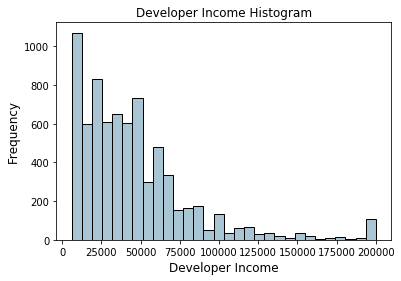

In [40]:
###### Adaptive Binning

fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
print(quantiles)

Text(0,0.5,'Frequency')

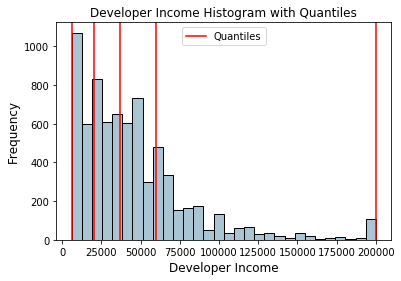

In [45]:
##### Adaptive binning contd 1...

fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [43]:
##### Adaptive binning contd 2...

quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(
                                            fcc_survey_df['Income'], 
                                            q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(
                                            fcc_survey_df['Income'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_quantile_range', 
               'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


                               ID.x   Age   Income  Income_log
4  9368291c93d5d5f5c8cdb1a575e18bec  20.0   6000.0    8.699681
5  dd0e77eab9270e4b67c19b0d6bbf621b  34.0  40000.0   10.596660
6  7599c0aa0419b59fd11ffede98a3665d  23.0  32000.0   10.373522
7  6dff182db452487f07a47596f314bddc  35.0  40000.0   10.596660
8  9dc233f8ed1c6eb2432672ab4bb39249  33.0  80000.0   11.289794


Text(11.5,450,'$\\mu$=10.43')

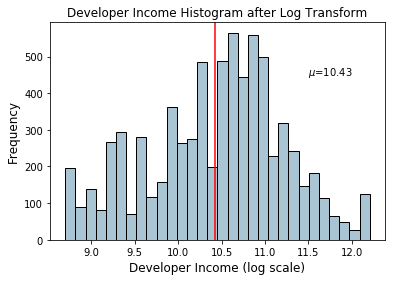

In [46]:


## Log transform
# Log of a variable is a common transformation method used to change the shape of distribution 
# of the variable on a distribution plot. It is generally used for reducing right skewness of variables. 
# Though, It can’t be applied to zero or negative values as well.

fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
print(fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9])

income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)
fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', 
             fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)